In [20]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score

In [40]:
df1=pd.read_csv("survey lung cancer.csv")

In [41]:
df=df1.copy()

In [42]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [46]:
df.head(3)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0


In [43]:
cat_columns=['SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC DISEASE','FATIGUE ','ALLERGY ','WHEEZING','ALCOHOL CONSUMING','COUGHING','SHORTNESS OF BREATH','SWALLOWING DIFFICULTY','CHEST PAIN']	
lamda_func=lambda x:0 if x==1 else 1
for i in cat_columns:
    df[i]=df[i].apply(lamda_func)	

In [45]:
lamda_func1=lambda x:1 if x=='M' else 0
df['GENDER']=df['GENDER'].apply(lamda_func1)

lamda_func2= lambda x:1 if x=='YES' else 0
df['LUNG_CANCER']=df['LUNG_CANCER'].apply(lamda_func2)



In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

<Axes: >

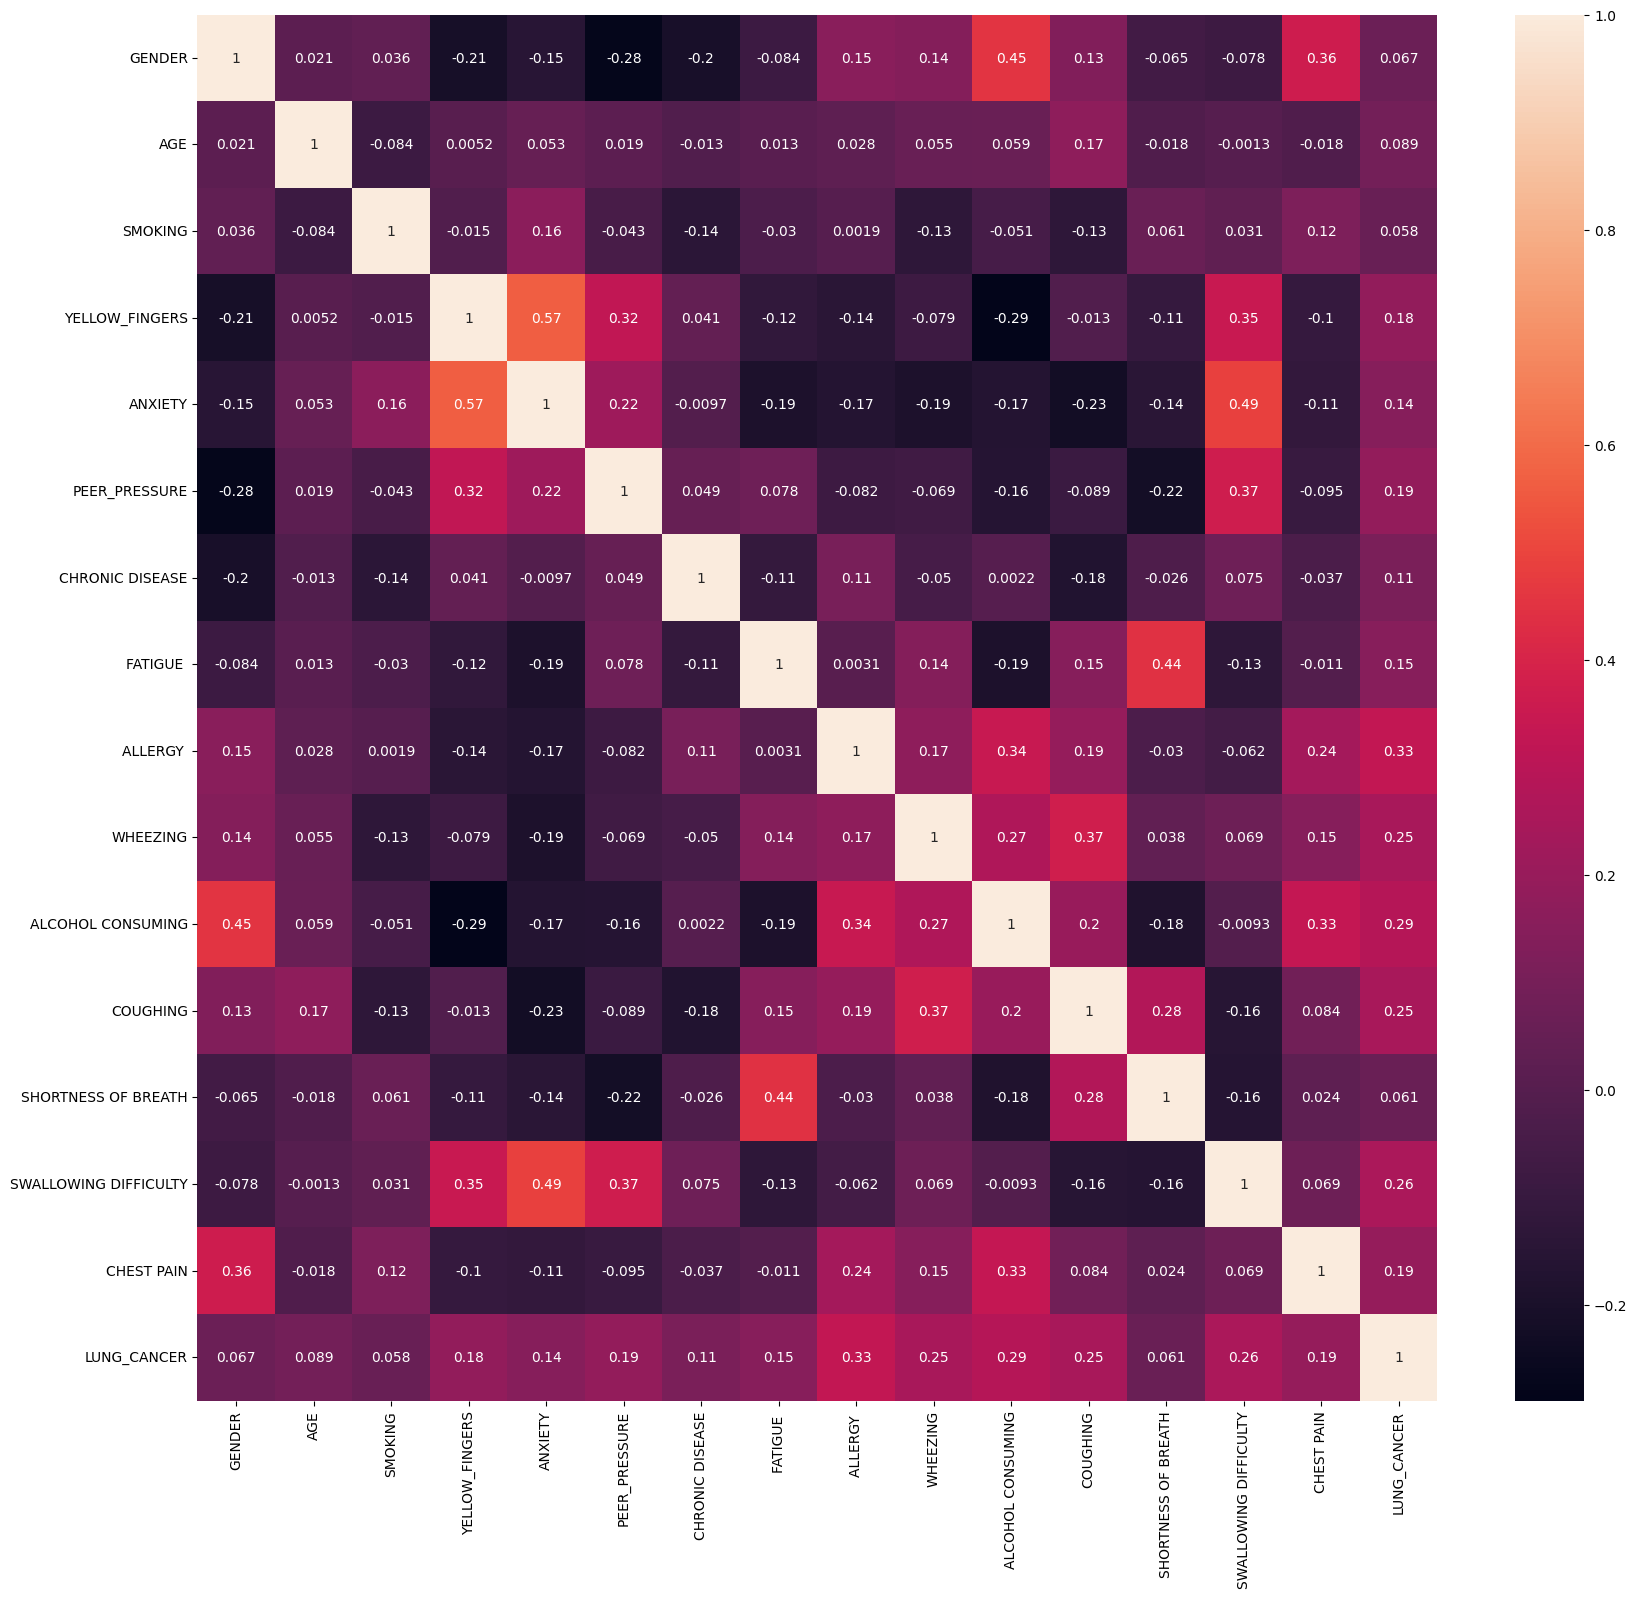

In [48]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(20,18))
sns.heatmap(corr,annot=True)

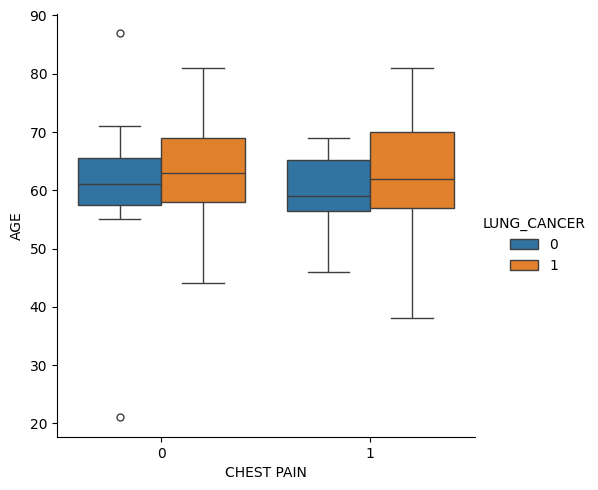

In [50]:
sns.catplot(data=df,x="CHEST PAIN",y="AGE",hue="LUNG_CANCER",kind='box')


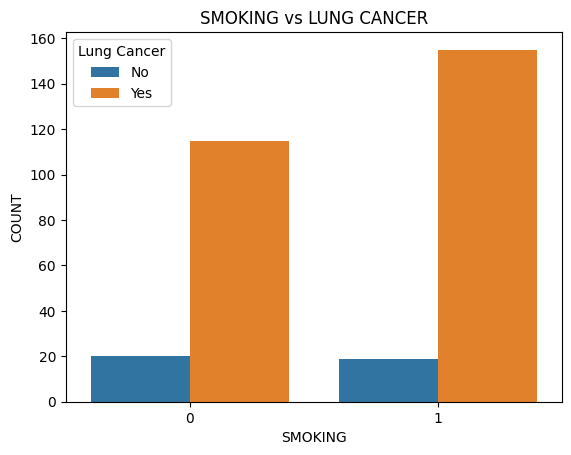

In [52]:
def parameter_vs_lung_cancer_plots(X,Y = 'LUNG_CANCER'):
    sns.countplot(x=X, hue=Y, data=df)
    plt.xlabel(X)
    plt.ylabel('COUNT')
    plt.title(f'{X} vs LUNG CANCER')
    plt.legend(title='Lung Cancer', labels=['No', 'Yes'])
    plt.show()

parameter_vs_lung_cancer_plots('SMOKING')


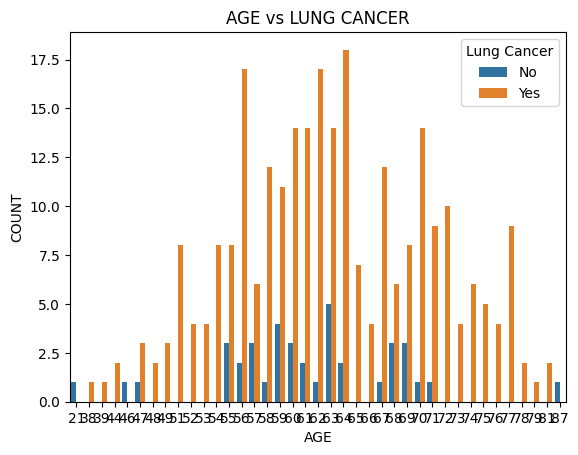

In [53]:
parameter_vs_lung_cancer_plots('AGE')

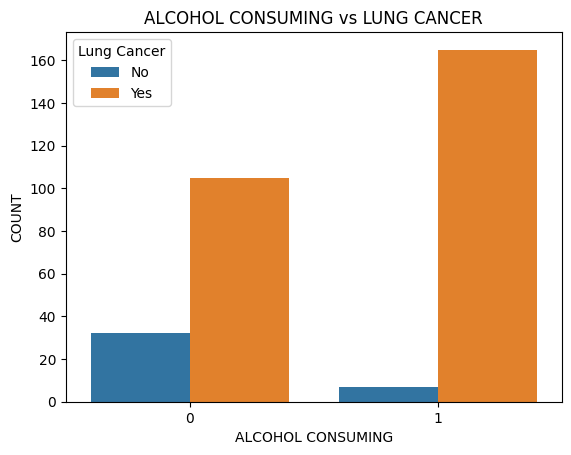

In [54]:
parameter_vs_lung_cancer_plots('ALCOHOL CONSUMING')

In [55]:
df.AGE=df.AGE/100

In [56]:
x=df.drop('LUNG_CANCER',axis=1)
y=df['LUNG_CANCER']

In [57]:
x.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,0.69,0,1,1,0,0,1,0,1,1,1,1,1,1
1,1,0.74,1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,0.59,0,0,0,1,0,1,0,1,0,1,1,0,1
3,1,0.63,1,1,1,0,0,0,0,0,1,0,0,1,1
4,0,0.63,0,1,0,0,0,0,0,1,0,1,1,0,0


In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=200)

In [59]:
 from sklearn.svm import SVC
svc=SVC()

In [60]:
model=svc.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))


0.8548387096774194


In [35]:
x_test.tail(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
34,1,0.59,0,1,1,0,0,0,0,0,0,0,0,1,1
92,1,0.52,1,0,0,0,1,1,1,1,1,0,0,1,1
73,0,0.60,1,0,0,0,1,1,0,0,0,0,1,0,0
49,1,0.60,0,0,1,1,1,0,0,0,1,0,0,0,0
267,1,0.60,1,1,1,1,1,0,1,0,1,0,0,1,1
270,0,0.70,1,0,0,0,0,1,0,0,0,0,1,0,0
233,0,0.49,0,1,1,0,0,0,0,0,0,1,0,0,0
260,0,0.59,0,1,1,1,1,1,0,1,1,0,0,0,0
40,1,0.68,1,0,1,0,0,1,1,0,1,1,1,0,1
145,0,0.65,1,1,1,1,0,1,0,1,0,1,1,1,0


In [26]:
y_test.head()

62     1
94     1
124    1
4      0
115    1
Name: LUNG_CANCER, dtype: int32

In [34]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1])

In [90]:
df.head(2)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,0.69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,0.74,1,0,0,0,1,1,1,0,0,0,1,1,1,1


In [101]:
model.predict([[1,	0.45,	0,	1,	1,	1,	0,	0,	0,	0,	1,	0,	1,	0,	0]])

array([1], dtype=int64)

In [63]:
x_train.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
221,1,0.61,0,0,1,1,1,0,0,0,1,0,0,0,0
146,1,0.51,0,1,0,0,1,1,1,1,1,1,1,0,1
308,1,0.62,0,0,0,1,0,1,1,1,1,0,0,1,0
101,0,0.81,0,1,1,1,1,1,1,1,0,1,1,1,1
294,1,0.67,0,0,0,1,0,1,0,1,0,1,1,0,1


In [25]:
y_test.head()

62     1
94     1
124    1
4      0
115    1
Name: LUNG_CANCER, dtype: int32

In [102]:


import joblib
joblib.dump(model,'svc_model.joblib')

['svc_model.joblib']

In [103]:
x_train.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN'],
      dtype='object')